In [1]:
import numpy as np
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
plt.xkcd()

In [2]:
legs = np.array([3.8, 4.8, 6.7])
print('short', legs)
# There must be an easier way to do this
legs_full  = np.concatenate((legs,legs,legs,legs,legs,legs,legs,legs))
legs_ultra = legs_full[:12]+legs_full[1:13]
legs_full  = np.insert(legs_full, 0, 0.)
legs_ultra = np.insert(legs_ultra, 0, 0.)
print('full ', legs_full, legs_full.size, legs_full.sum())
print('ultra', legs_ultra, legs_ultra.size, legs_ultra.sum())

short [ 3.8  4.8  6.7]
full  [ 0.   3.8  4.8  6.7  3.8  4.8  6.7  3.8  4.8  6.7  3.8  4.8  6.7  3.8  4.8
  6.7  3.8  4.8  6.7  3.8  4.8  6.7  3.8  4.8  6.7] 25 122.4
ultra [  0.    8.6  11.5  10.5   8.6  11.5  10.5   8.6  11.5  10.5   8.6  11.5
  10.5] 13 122.4


<IPython.core.display.Javascript object>


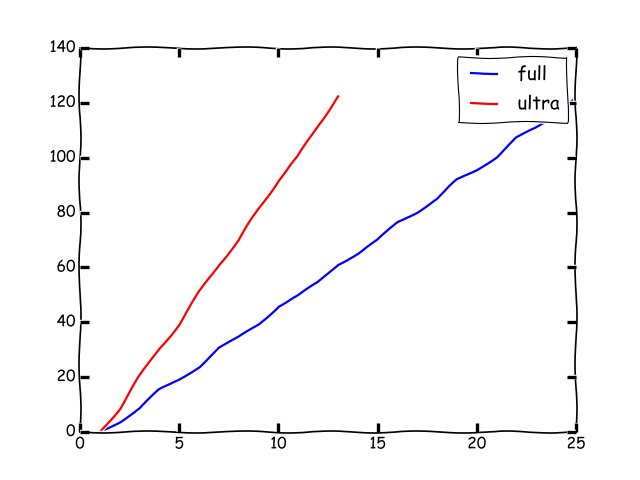

In [3]:
fig, axes  = plt.subplots()
axes.plot(np.arange(legs_full.size)+1, np.add.accumulate(legs_full), label='full')
axes.plot(np.arange(legs_ultra.size)+1, np.add.accumulate(legs_ultra), label='ultra')
axes.legend()

In [4]:
time_ultra = legs_ultra * np.timedelta64(int(10*60), 's')
print(time_ultra)
time_start = np.datetime64('2017-04-21T12:00')
print(np.add.accumulate(time_ultra)+time_start)

[   0 5160 6900 6300 5160 6900 6300 5160 6900 6300 5160 6900 6300]
['2017-04-21T12:00:00' '2017-04-21T13:26:00' '2017-04-21T15:21:00'
 '2017-04-21T17:06:00' '2017-04-21T18:32:00' '2017-04-21T20:27:00'
 '2017-04-21T22:12:00' '2017-04-21T23:38:00' '2017-04-22T01:33:00'
 '2017-04-22T03:18:00' '2017-04-22T04:44:00' '2017-04-22T06:39:00'
 '2017-04-22T08:24:00']


<IPython.core.display.Javascript object>


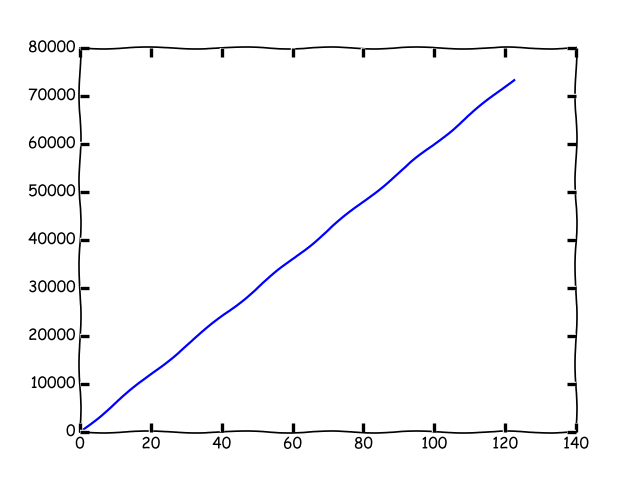

In [5]:
from matplotlib.dates import DateFormatter, DayLocator, HourLocator

fig, axes  = plt.subplots()
axes.plot(np.add.accumulate(legs_ultra), np.add.accumulate(time_ultra), label='ultra')
#axes.yaxis.set_major_locator(HourLocator(interval=1))
#axes.fmt_ydata = DateFormatter('%d %H:%M:%S')